# Step 1 Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data 

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import dataset

path = r'C:\Users\X1\Instacart Basket Analysis Master'
df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_customer_merged.pkl'))

In [3]:
df.head()

,user_id,first_name,last_name,gender,state,age,date_joined,children,fam_status,income,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_spent,spending_flag,median_days,frequent_customer_flag,merge_indicator
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Mid-range product,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
df.shape

(32434212, 32)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434212 entries, 0 to 32434211
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 object  
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   children                int64   
 8   fam_status              object  
 9   income                  int64   
 10  order_id                int64   
 11  order_number            int64   
 12  orders_day_of_week      int64   
 13  order_hour_of_day       int64   
 14  days_since_prior_order  float64 
 15  product_id              int64   
 16  add_to_cart_order       int64   
 17  reordered               int64   
 18  product_name            object  
 19  aisle_id                int64   
 20  department_id           int64   
 21  prices

# Step 2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<Axes: xlabel='orders_day_of_week'>

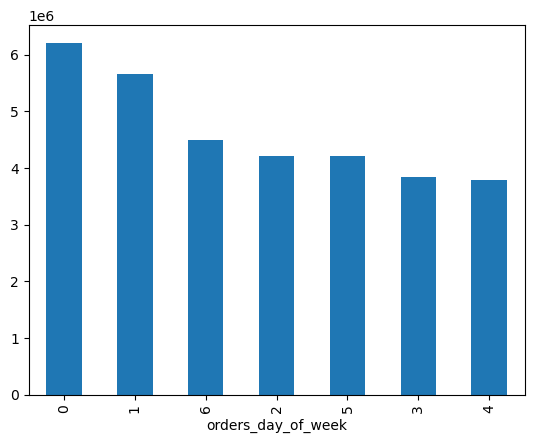

In [8]:
# Create bar chart using ordrs_day_of_week column

df['orders_day_of_week'].value_counts().plot.bar()

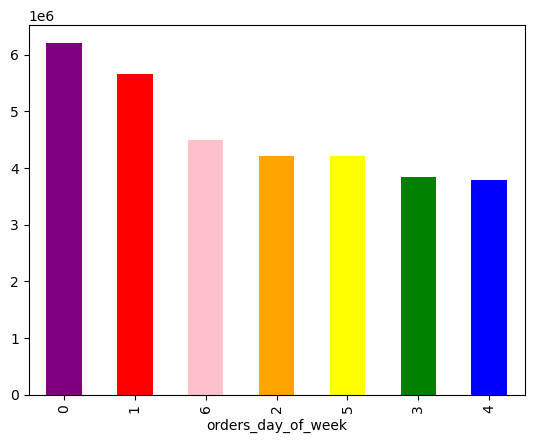

In [10]:
# Add color

bar = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
# Export bar chart

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day_of_week.png'))

<Axes: ylabel='Frequency'>

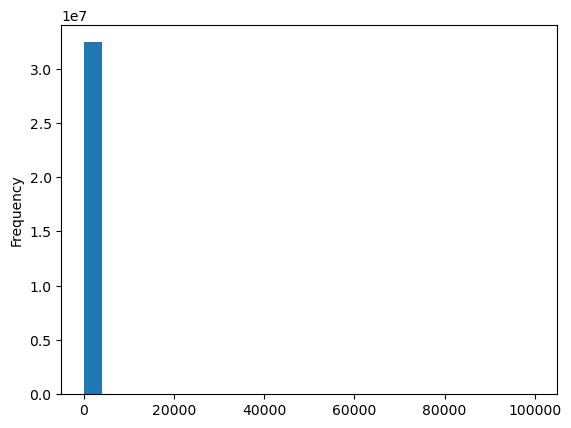

In [12]:
# Create histogram of prices column

df['prices'].plot.hist(bins = 25)

#### The histogram looks wrong.

In [13]:
# Check the stats of prices column

df['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

#### The MAX is odd.

In [14]:
# Check mean, median, max

df['prices'].mean()

11.981143922966302

In [15]:
df['prices'].median()

7.4

In [16]:
df['prices'].max()

99999.0

#### How could an item cost $99,999.00?

<Axes: xlabel='prices', ylabel='prices'>

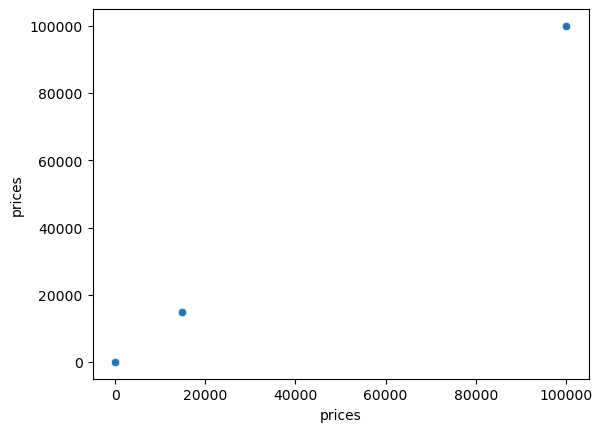

In [17]:
# Create scatterplot to check if any outliers

sns.scatterplot(x = 'prices', y = 'prices',data = df)

In [19]:
# Determine whether there are any values above a certain threshold

df.loc[df['prices'] > 100]

,user_id,first_name,last_name,gender,state,age,date_joined,children,fam_status,income,...,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price_spent,spending_flag,median_days,frequent_customer_flag,merge_indicator
5547,117740,Lisa,Sparks,Female,Oregon,55,1/1/2017,1,married,292759,...,High-range product,Busiest days,Most orders,84,Loyal customer,36.928431,High spender,4.0,Frequent customer,both
10305,31590,Beverly,Sanford,Female,Montana,46,1/1/2017,0,single,154076,...,High-range product,Busiest days,Average orders,38,Regular customer,58.139865,High spender,8.0,Frequent customer,both
27956,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,High-range product,Regularly busy,Average orders,5,New customer,627.991667,High spender,11.0,Regular customer,both
27957,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,High-range product,Busiest days,Most orders,5,New customer,627.991667,High spender,11.0,Regular customer,both
27958,100958,Benjamin,Parsons,Male,North Dakota,18,1/2/2017,2,living with parents and siblings,113408,...,High-range product,Busiest days,Most orders,5,New customer,627.991667,High spender,11.0,Regular customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32420268,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,High-range product,Slowest days,Most orders,53,Loyal customer,69.638604,High spender,7.0,Frequent customer,both
32420269,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,High-range product,Regularly busy,Average orders,53,Loyal customer,69.638604,High spender,7.0,Frequent customer,both
32420270,5519,Kathy,Daniel,Female,Georgia,78,4/1/2020,3,married,262610,...,High-range product,Regularly busy,Most orders,53,Loyal customer,69.638604,High spender,7.0,Frequent customer,both
32426336,140589,Clarence,Harper,Male,Maryland,26,4/1/2020,0,single,154845,...,High-range product,Regularly busy,Average orders,9,New customer,876.974783,High spender,20.0,Regular customer,both


#### For now, let’s mark them as missing since they don’t make sense in terms of the other values in the column.

In [20]:
# Turn values over 100 as missing values
# Replace outliers with NaNs

df.loc[df['prices'] >100, 'prices'] = np.nan

In [21]:
# Check if change was successful

df['prices'].max()

25.0

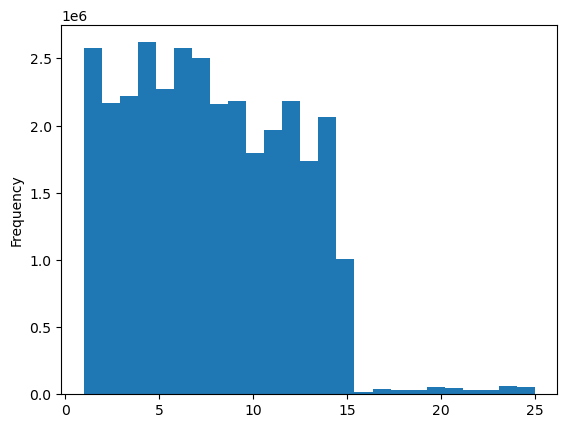

In [22]:
# Retry histogram of 'prices' column

hist = df['prices'].plot.hist(bins = 25)

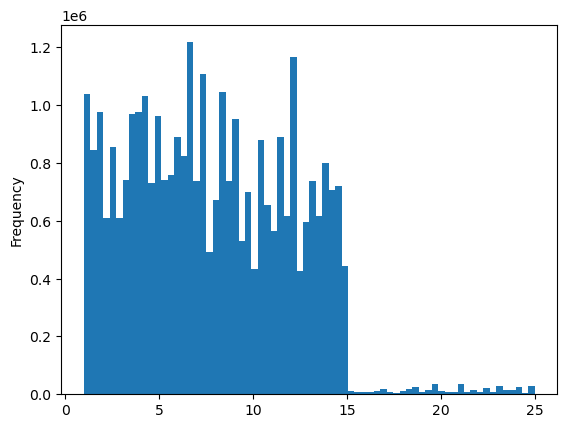

In [24]:
# Increase bins to 70 for more thinner columns

hist_2 = df['prices'].plot.hist(bins = 70)

In [25]:
# Export as hist

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_prices.png'))

In [26]:
# Create subset for line chart

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [27]:
dev

array([False,  True, False, ..., False,  True,  True])

In [29]:
# How many rows are in the ords_prods_merge dataframe?

len(df)

32434212

In [30]:
# Create a list holding True/False values to the test np.random.rant() <=0.7

dev = np.random.rand(len(df)) <= 0.7

In [31]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [32]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

#### Check if it worked correctly

In [34]:
len(df)

32434212

In [35]:
len(big) + len(small)

32434212

In [36]:
# Reduce samples to only columns necessary for the chart: “prices” & “orders_day_of_week”

df_2 = small[['orders_day_of_week','prices']]

C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


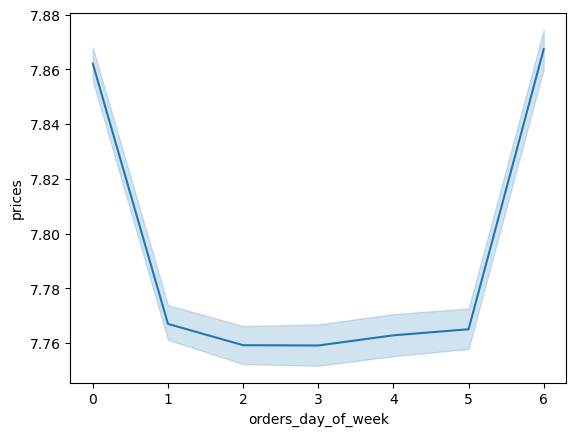

In [37]:
# Create line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [56]:
# Export linegraph

line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_orders_day_of_week.png'))

# Step 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

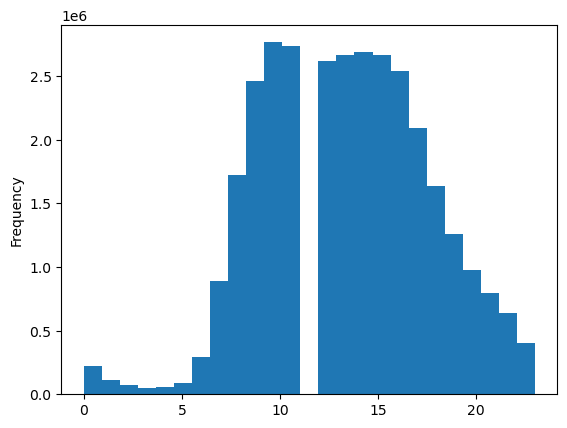

In [57]:
# Histogram of 'order_hour_of_day'

hist_3 = df['order_hour_of_day'].plot.hist(bins = 25)

In [58]:
# Export histogram chart

hist_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

#### It looks that most of the orders are made around noon and slowly decrease as the day goes on.  However, it is odd that there is a blank space around 11-12 PM, implying that no orders are being placed at all.

# Step 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

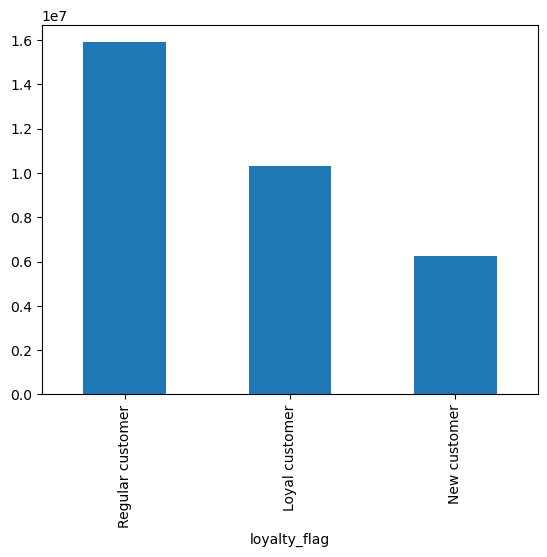

In [59]:
# Create bar chart using 'loyalty_flag' column

bar_2 = df['loyalty_flag'].value_counts().plot.bar()

In [60]:
# Export bar chart

bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

# Step 5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day.

In [43]:
# Reduce samples to only columns necessary for the chart: “prices” & “order_hour_of_day”

df_3 = small[['order_hour_of_day','prices']]

C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


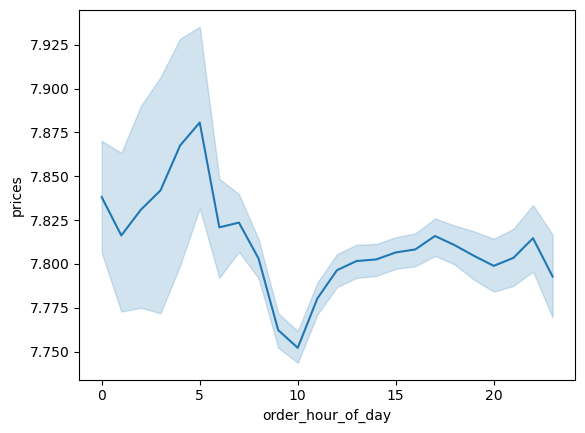

In [61]:
# Create line graph

line_2 = sns.lineplot(data = df_3, x = 'order_hour_of_day', y = 'prices')

In [62]:
# Export linegraph

line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_prices.png'))

# Step 6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

In [50]:
# Reduce samples to only columns necessary for the chart: “age” & “children”

df_4 = small[['age','children']]

C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


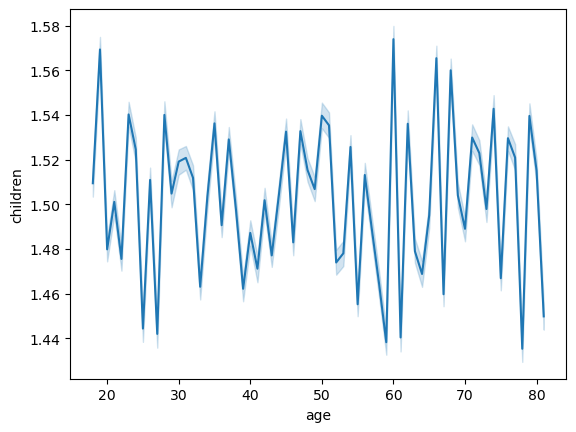

In [63]:
# Create line graph

line_3 = sns.lineplot(data = df_4, x = 'age', y = 'children')

In [64]:
# Export linegraph

line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_children.png'))

#### There is no correlation between user age and number of dependents.  The line chart does not seem to have a significant pattern.

# Step 7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

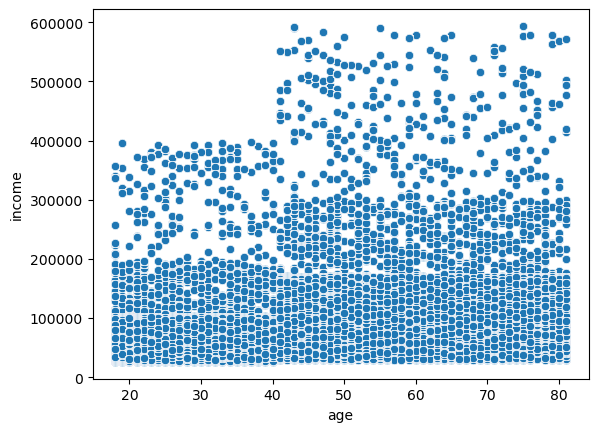

In [65]:
# Create scatterplot for age and income

scatter = sns.scatterplot(x = 'age', y = 'income',data = df)

#### The scatterplot shows the majority of users aged 20-80 reported income between 0 & 20k. The smallest group of users with reported income between 40k & 60k are ages 40-80. We can conclude that users 40 and older have higher income than users 39 and younger.

In [66]:
# Export scatterplot

scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_orders_day_of_week.png'))